In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from glob import glob

In [3]:
WACCM_path = '../DataSorted/2004-11-11*/*.nc'

WACCM_files = []

if len(glob(WACCM_path)) == 1:
    WACCM_files = [netCDF4.Dataset(glob(WACCM_path)[0])]
elif len(glob(WACCM_path)) > 1:
    for file in glob(WACCM_path):
        WACCM_files.append(netCDF4.Dataset(glob(file)[0]))

f = WACCM_files[0]

H = 7
p0 = 1013.25
k = 1.38*10**(-23) # J/K
z = lambda p : - H * np.log(p/p0)
def Ne_convert(e: float,P: float,T: float) -> float:
    """Convert electron concentration to density

    Args:
        e (float): Mixing ration
        P (float): Pressure
        T (float): Temperature

    Returns:
        float: Electron density
    """
    return e*P/(k*T)

In [4]:
print(f.variables.keys())
lat = f['instr_lat']
lon = f['instr_lon']
num = f['instr_num']
date = f['obs_date']
time = f['obs_time']
lev = f['lev']
Ne = f['e']
T = f['T']

dict_keys(['lat', 'lon', 'lev', 'hyam', 'hybm', 'P0', 'ilev', 'hyai', 'hybi', 'time', 'date', 'datesec', 'instr_lat', 'instr_lon', 'obs_time', 'obs_date', 'distance', 'orbit_num', 'prof_num', 'instr_num', 'BRO', 'CH4', 'CL', 'CLO', 'CLONO2', 'CLOm', 'CLm', 'CLm_H2O', 'CLm_HCL', 'CO', 'CO3m', 'CO3m2H2O', 'CO3m_H2O', 'CO4m', 'EPP_ionpairs', 'EPPions', 'H', 'H2', 'H2O', 'H3Op_OH', 'HCL', 'HCO3m', 'HNO3', 'HOX', 'Hp_2H2O', 'Hp_3H2O', 'Hp_3N1', 'Hp_4H2O', 'Hp_4N1', 'Hp_5H2O', 'Hp_H2O', 'N', 'N2O', 'N2O5', 'N2p', 'NO2m', 'NO2m_H2O', 'NO3', 'NO3m', 'NO3m2H2O', 'NO3mHNO3', 'NO3m_H2O', 'NO3m_HCL', 'NOX', 'NOY', 'NOp', 'NOp_2H2O', 'NOp_3H2O', 'NOp_CO2', 'NOp_H2O', 'NOp_N2', 'Np', 'O', 'O2', 'O2m', 'O2p', 'O2p_H2O', 'O3', 'O3m', 'O4m', 'O4p', 'OHm', 'Om', 'Op', 'PS', 'P_IONS', 'QSUM', 'T', 'Z3', 'e'])


In [5]:
mask1_tromso = lat[:] > 69.5 
mask2_tromso = lat[:] < 69.7

mask1_svalbard = lat[:] > 78.8 
mask2_svalbard = lat[:] < 79.0

mask_tromso = mask1_tromso*mask2_tromso
mask_svalbard = mask1_svalbard*mask2_svalbard

print('Tromso', num[mask_tromso][0])
print('Svalbard', num[mask_svalbard][0])
print('Longitude', lon[mask_svalbard][0])

Tromso 125
Svalbard 1
Longitude 354.81375


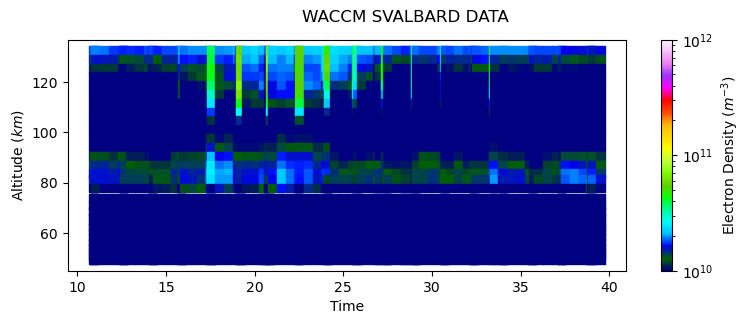

In [6]:
lev_mask = lev[:] < 1
P = lev[lev_mask]
h = z(P)
Ne_svalbard = []
for array in Ne[mask_svalbard]:
    Ne_svalbard.append(array[lev_mask])

Ne_svalbard = np.array(Ne_svalbard)
hours = time[mask_svalbard]/3600

mask_hours = [hours[i] > hours[i+1] for i in range(len(hours)-1)]
indices = [i+1 for i, value in enumerate(mask_hours) if value]

for indice in indices:
    hours[indice:] = hours[indice:] + 24

fig, ax = plt.subplots(figsize=(9, 3))

i = 0
for hour in hours:
    sc = ax.scatter(np.repeat(hour, len(h)), h, c = Ne_convert(Ne_svalbard[i],P*100,T[i][lev_mask]), cmap='gist_ncar', norm=LogNorm(vmin=10e9, vmax=10e11),marker = 's')
    i += 1

cbar = fig.colorbar(sc, ax=ax)
cbar.set_label(r'Electron Density ($m^{-3}$)')
ax.set_ylabel(r'Altitude ($km$)')
ax.set_xlabel(r'Time')
fig.suptitle('WACCM SVALBARD DATA' + '\n' )
plt.show()

In [9]:
print(hours)

[19.5075 20.0075 20.378611111111113 20.447222222222223 20.5075 21.0075
 21.5075 22.0075 22.026666666666667 22.095277777777778 22.5075 23.0075
 23.5075 23.674722222222222 23.743333333333332 24.0075 24.5075 25.0075
 25.322777777777777 25.39138888888889 25.5075 26.0075 26.5075
 26.97083333333333 27.0075 27.039444444444445 27.5075 28.0075 28.5075
 28.61888888888889 28.6875 29.0075 29.5075 30.0075 30.266944444444444
 30.335555555555555 30.5075 31.0075 31.5075 31.915 31.98361111111111
 32.0075 32.5075 33.0075 33.5075 33.56305555555556 33.63166666666667
 34.0075 34.5075 35.0075 35.21111111111111 35.27972222222222 35.5075
 36.0075 36.5075 36.85916666666667 36.92777777777778 37.0075 37.5075
 38.0075 38.507222222222225 38.5075 38.575833333333335 39.0075 39.5075
 40.0075 40.155277777777776 40.223888888888894 40.5075 41.0075 41.5075
 41.80305555555556 41.871944444444445 42.0075 42.5075 43.0075
 43.45111111111111 43.5075 43.519999999999996 44.0075 44.5075 45.0075
 45.09916666666666 45.1680555555555